In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


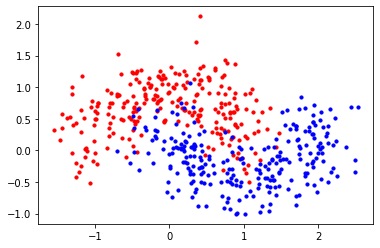

In [2]:
#moons dataset as per book
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, shuffle=False, noise=0.3, random_state=42)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

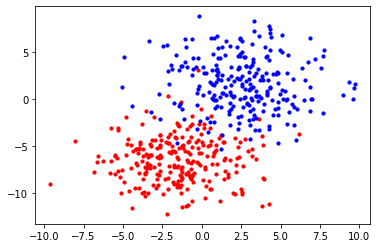

In [37]:

#Generating a dataset made of clusters to work on

centers = [(-1.5, -6.5), (2.5, 1.5)]
cluster_std = [2.5, 2.8]
#made it a bit overlapping otherwise the votes would go very close to one

X, y = make_blobs(n_samples=500, cluster_std=cluster_std, centers=centers, n_features=2,random_state=42)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

#enable soft voting w/probability=true on SVC

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))])

In [5]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,"=", accuracy_score(y_test, y_pred))
#Can't seem to find an istance where the VotingClassiiers CLEARLY outperforms the others

LogisticRegression = 0.949
RandomForestClassifier = 0.948
SVC = 0.949
VotingClassifier = 0.949


In [6]:
#BAGGING - auto soft vote
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
     max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf, bag_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,"=", accuracy_score(y_test, y_pred))

print("BaggingClassifier(oob) =",bag_clf.oob_score_) #close enough



LogisticRegression = 0.949
RandomForestClassifier = 0.947
SVC = 0.949
VotingClassifier = 0.949
BaggingClassifier = 0.953
BaggingClassifier(oob) = 0.95075


In [7]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print(rnd_clf.__class__.__name__,"=", accuracy_score(y_test, y_pred)) #close enough

#EQUIVALENT BCF:
# bag_clf_r = BaggingClassifier(
#     DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
#     n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

RandomForestClassifier = 0.953


In [8]:
# feture importance measurments - please note that every run obviously returns slightly different results
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
     print(name, score)

sepal length (cm) 0.10235662946099429
sepal width (cm) 0.02424205997631176
petal length (cm) 0.42504132190403987
petal width (cm) 0.44835998865865406


In [9]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

print(ada_clf.__class__.__name__,"=", accuracy_score(y_test, y_pred)) #close enough

AdaBoostClassifier = 0.953
